# Fig. 10: RGC type classifier performance

## Imports

In [1]:
import os
from copy import deepcopy

import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# ------------------------------------------------------------------------------------------------------------

# Load datasets

In [2]:
file_path = '../data'
file_name = 'rgc_baden_2016.h5'
joined_path = os.path.join(file_path, file_name)

with h5py.File(joined_path, 'r') as h5file:
    rgc_baden = {key: h5file[key][...] for key in h5file.keys()}

In [3]:
file_name = 'rd10_filtered_data.h5'
joined_path = os.path.join(file_path, file_name)
rd10_df = pd.read_hdf(joined_path, key='df')

# ------------------------------------------------------------------------------------------------------------

# helper functions

In [4]:
def translate_functional_groups(labels):
    labels_func = deepcopy(labels)
    for n, i in enumerate(labels_func):
        if i < 10:
            labels_func[n] = 1
        elif (i > 9) & (i < 15):
            labels_func[n] = 2
        elif (i > 14) & (i < 21):
            labels_func[n] = 3
        elif (i > 20) & (i < 29):
            labels_func[n] = 4
        elif (i > 28) & (i < 33):
            labels_func[n] = 5
        elif i > 32:
            labels_func[n] = 6

    return labels_func


def compute_OOi(bar_data):
    ooi_bar = np.zeros(bar_data.shape[0])
    for k in range(ooi_bar.shape[0]):
        a = np.mean(np.clip(np.diff(bar_data[k, :16]), 0, 1))
        b = np.mean(np.clip(np.diff(bar_data[k, 16:]), 0, 1))
        ooi_bar[k] = (a - b) / (a + b)

    return ooi_bar

# ------------------------------------------------------------------------------------------------------------

# Compute ratio between cs=0 vs. cs=0.25

In [5]:
func_labels = translate_functional_groups(rd10_df['celltype'].values[:])
rd10_df['func_labels'] = func_labels

In [6]:
cs_ratio_wt = round(rd10_df[(rd10_df['max_confidence'] >= 0.25) & (rd10_df['genline'] == 'Bl6')].shape[0] /
                    rd10_df[(rd10_df['max_confidence'] >= 0.0) & (rd10_df['genline'] == 'Bl6')].shape[0] * 100, 2)
cs_ratio_rd = round(rd10_df[(rd10_df['max_confidence'] >= 0.25) & (rd10_df['genline'] == 'rd10')].shape[0] /
                    rd10_df[(rd10_df['max_confidence'] >= 0.0) & (rd10_df['genline'] == 'rd10')].shape[0] * 100, 2)

cs_ratio_wt_p30 = round(
    rd10_df[(rd10_df['max_confidence'] >= 0.25) & (rd10_df['genline'] == 'Bl6') & (rd10_df['animrem'] == 'P30')].shape[
        0] /
    rd10_df[(rd10_df['max_confidence'] >= 0.0) & (rd10_df['genline'] == 'Bl6') & (rd10_df['animrem'] == 'P30')].shape[
        0] * 100, 2)
cs_ratio_rd_p30 = round(
    rd10_df[(rd10_df['max_confidence'] >= 0.25) & (rd10_df['genline'] == 'rd10') & (rd10_df['animrem'] == 'P30')].shape[
        0] /
    rd10_df[(rd10_df['max_confidence'] >= 0.0) & (rd10_df['genline'] == 'rd10') & (rd10_df['animrem'] == 'P30')].shape[
        0] * 100, 2)

cs_ratio_wt_p45 = round(
    rd10_df[(rd10_df['max_confidence'] >= 0.25) & (rd10_df['genline'] == 'Bl6') & (rd10_df['animrem'] == 'P45')].shape[
        0] /
    rd10_df[(rd10_df['max_confidence'] >= 0.0) & (rd10_df['genline'] == 'Bl6') & (rd10_df['animrem'] == 'P45')].shape[
        0] * 100, 2)
cs_ratio_rd_p45 = round(
    rd10_df[(rd10_df['max_confidence'] >= 0.25) & (rd10_df['genline'] == 'rd10') & (rd10_df['animrem'] == 'P45')].shape[
        0] /
    rd10_df[(rd10_df['max_confidence'] >= 0.0) & (rd10_df['genline'] == 'rd10') & (rd10_df['animrem'] == 'P45')].shape[
        0] * 100, 2)

cs_ratio_wt_p90 = round(
    rd10_df[(rd10_df['max_confidence'] >= 0.25) & (rd10_df['genline'] == 'Bl6') & (rd10_df['animrem'] == 'P90')].shape[
        0] /
    rd10_df[(rd10_df['max_confidence'] >= 0.0) & (rd10_df['genline'] == 'Bl6') & (rd10_df['animrem'] == 'P90')].shape[
        0] * 100, 2)
cs_ratio_rd_p90 = round(
    rd10_df[(rd10_df['max_confidence'] >= 0.25) & (rd10_df['genline'] == 'rd10') & (rd10_df['animrem'] == 'P90')].shape[
        0] /
    rd10_df[(rd10_df['max_confidence'] >= 0.0) & (rd10_df['genline'] == 'rd10') & (rd10_df['animrem'] == 'P90')].shape[
        0] * 100, 2)

In [7]:
cs_thres = 0.25

cs_ratio_wt_types = np.zeros((5, 4))
cs_ratio_rd_types = np.zeros((5, 4))

for i in range(5):
    cs_ratio_wt_types[i, 0] = round(rd10_df[(rd10_df['max_confidence'] >= cs_thres) & (rd10_df['genline'] == 'Bl6') & (
            rd10_df['animrem'] == 'P30') & (rd10_df['func_labels'] == i + 1)].shape[0] / rd10_df[
                                        (rd10_df['max_confidence'] >= 0.0) & (rd10_df['genline'] == 'Bl6') & (
                                                rd10_df['animrem'] == 'P30') & (
                                                rd10_df['func_labels'] == i + 1)].shape[0] * 100, 2)
    cs_ratio_wt_types[i, 1] = round(rd10_df[(rd10_df['max_confidence'] >= cs_thres) & (rd10_df['genline'] == 'Bl6') & (
            rd10_df['animrem'] == 'P45') & (rd10_df['func_labels'] == i + 1)].shape[0] / rd10_df[
                                        (rd10_df['max_confidence'] >= 0.0) & (rd10_df['genline'] == 'Bl6') & (
                                                rd10_df['animrem'] == 'P45') & (
                                                rd10_df['func_labels'] == i + 1)].shape[0] * 100, 2)
    cs_ratio_wt_types[i, 2] = round(rd10_df[(rd10_df['max_confidence'] >= cs_thres) & (rd10_df['genline'] == 'Bl6') & (
            rd10_df['animrem'] == 'P90') & (rd10_df['func_labels'] == i + 1)].shape[0] / rd10_df[
                                        (rd10_df['max_confidence'] >= 0.0) & (rd10_df['genline'] == 'Bl6') & (
                                                rd10_df['animrem'] == 'P90') & (
                                                rd10_df['func_labels'] == i + 1)].shape[0] * 100, 2)
    cs_ratio_wt_types[i, 3] = round(rd10_df[(rd10_df['max_confidence'] >= cs_thres) & (rd10_df['genline'] == 'Bl6') & (
            rd10_df['func_labels'] == i + 1)].shape[0] / rd10_df[
                                        (rd10_df['max_confidence'] >= 0.0) & (rd10_df['genline'] == 'Bl6') & (
                                                rd10_df['func_labels'] == i + 1)].shape[0] * 100, 2)

    cs_ratio_rd_types[i, 0] = round(rd10_df[(rd10_df['max_confidence'] >= cs_thres) & (rd10_df['genline'] == 'rd10') & (
            rd10_df['animrem'] == 'P30') & (rd10_df['func_labels'] == i + 1)].shape[0] / rd10_df[
                                        (rd10_df['max_confidence'] >= 0.0) & (rd10_df['genline'] == 'rd10') & (
                                                rd10_df['animrem'] == 'P30') & (
                                                rd10_df['func_labels'] == i + 1)].shape[0] * 100, 2)
    cs_ratio_rd_types[i, 1] = round(rd10_df[(rd10_df['max_confidence'] >= cs_thres) & (rd10_df['genline'] == 'rd10') & (
            rd10_df['animrem'] == 'P45') & (rd10_df['func_labels'] == i + 1)].shape[0] / rd10_df[
                                        (rd10_df['max_confidence'] >= 0.0) & (rd10_df['genline'] == 'rd10') & (
                                                rd10_df['animrem'] == 'P45') & (
                                                rd10_df['func_labels'] == i + 1)].shape[0] * 100, 2)
    cs_ratio_rd_types[i, 2] = round(rd10_df[(rd10_df['max_confidence'] >= cs_thres) & (rd10_df['genline'] == 'rd10') & (
            rd10_df['animrem'] == 'P90') & (rd10_df['func_labels'] == i + 1)].shape[0] / rd10_df[
                                        (rd10_df['max_confidence'] >= 0.0) & (rd10_df['genline'] == 'rd10') & (
                                                rd10_df['animrem'] == 'P90') & (
                                                rd10_df['func_labels'] == i + 1)].shape[0] * 100, 2)
    cs_ratio_rd_types[i, 3] = round(rd10_df[(rd10_df['max_confidence'] >= cs_thres) & (rd10_df['genline'] == 'rd10') & (
            rd10_df['func_labels'] == i + 1)].shape[0] / rd10_df[
                                        (rd10_df['max_confidence'] >= 0.0) & (rd10_df['genline'] == 'rd10') & (
                                                rd10_df['func_labels'] == i + 1)].shape[0] * 100, 2)

# ------------------------------------------------------------------------------------

# Compute On-Off index

## split datasets

In [8]:
rd10_df_wt = rd10_df[rd10_df['genline'] == 'Bl6'].reset_index(drop=True)
rd10_p30 = rd10_df_wt[(rd10_df_wt['animrem'] == 'P30')].reset_index(drop=True)
rd10_p45 = rd10_df_wt[(rd10_df_wt['animrem'] == 'P45')].reset_index(drop=True)
rd10_p90 = rd10_df_wt[(rd10_df_wt['animrem'] == 'P90')].reset_index(drop=True)

In [9]:
# P30
chirp_traces_p30 = np.zeros((rd10_p30['preproc_chirp'].shape[0], rd10_p30['preproc_chirp'][0].shape[0]))
bar_traces_p30 = np.zeros((rd10_p30['preproc_bar'].shape[0], rd10_p30['preproc_bar'][0].shape[0]))
for i in range(chirp_traces_p30.shape[0]):
    chirp_traces_p30[i, :] = rd10_p30['preproc_chirp'][i]
    bar_traces_p30[i, :] = rd10_p30['preproc_bar'][i]

# P45
chirp_traces_p45 = np.zeros((rd10_p45['preproc_chirp'].shape[0], rd10_p45['preproc_chirp'][0].shape[0]))
bar_traces_p45 = np.zeros((rd10_p45['preproc_bar'].shape[0], rd10_p45['preproc_bar'][0].shape[0]))
for i in range(chirp_traces_p45.shape[0]):
    chirp_traces_p45[i, :] = rd10_p45['preproc_chirp'][i]
    bar_traces_p45[i, :] = rd10_p45['preproc_bar'][i]

# P90
chirp_traces_p90 = np.zeros((rd10_p90['preproc_chirp'].shape[0], rd10_p90['preproc_chirp'][0].shape[0]))
bar_traces_p90 = np.zeros((rd10_p90['preproc_bar'].shape[0], rd10_p90['preproc_bar'][0].shape[0]))
for i in range(chirp_traces_p90.shape[0]):
    chirp_traces_p90[i, :] = rd10_p90['preproc_chirp'][i]
    bar_traces_p90[i, :] = rd10_p90['preproc_bar'][i]

std_chirp_p30 = np.std(chirp_traces_p30)
std_bar_p30 = np.std(bar_traces_p30)
std_chirp_p45 = np.std(chirp_traces_p45)
std_bar_p45 = np.std(bar_traces_p45)
std_chirp_p90 = np.std(chirp_traces_p90)
std_bar_p90 = np.std(bar_traces_p90)

In [10]:
rd10_df_rd = rd10_df[rd10_df['genline'] == 'rd10'].reset_index(drop=True)
rd10_p30_rd = rd10_df_rd[(rd10_df_rd['animrem'] == 'P30')].reset_index(drop=True)
rd10_p45_rd = rd10_df_rd[(rd10_df_rd['animrem'] == 'P45')].reset_index(drop=True)
rd10_p90_rd = rd10_df_rd[(rd10_df_rd['animrem'] == 'P90')].reset_index(drop=True)

# P30
chirp_traces_p30_rd = np.zeros((rd10_p30_rd['preproc_chirp'].shape[0], rd10_p30_rd['preproc_chirp'][0].shape[0]))
bar_traces_p30_rd = np.zeros((rd10_p30_rd['preproc_bar'].shape[0], rd10_p30_rd['preproc_bar'][0].shape[0]))
for i in range(chirp_traces_p30_rd.shape[0]):
    chirp_traces_p30_rd[i, :] = rd10_p30_rd['preproc_chirp'][i]
    bar_traces_p30_rd[i, :] = rd10_p30_rd['preproc_bar'][i]

# P45
chirp_traces_p45_rd = np.zeros((rd10_p45_rd['preproc_chirp'].shape[0], rd10_p45_rd['preproc_chirp'][0].shape[0]))
bar_traces_p45_rd = np.zeros((rd10_p45_rd['preproc_bar'].shape[0], rd10_p45_rd['preproc_bar'][0].shape[0]))
for i in range(chirp_traces_p45_rd.shape[0]):
    chirp_traces_p45_rd[i, :] = rd10_p45_rd['preproc_chirp'][i]
    bar_traces_p45_rd[i, :] = rd10_p45_rd['preproc_bar'][i]

# P90
chirp_traces_p90_rd = np.zeros((rd10_p90_rd['preproc_chirp'].shape[0], rd10_p90_rd['preproc_chirp'][0].shape[0]))
bar_traces_p90_rd = np.zeros((rd10_p90_rd['preproc_bar'].shape[0], rd10_p90_rd['preproc_bar'][0].shape[0]))
for i in range(chirp_traces_p90_rd.shape[0]):
    chirp_traces_p90_rd[i, :] = rd10_p90_rd['preproc_chirp'][i]
    bar_traces_p90_rd[i, :] = rd10_p90_rd['preproc_bar'][i]

std_chirp_rd_p30 = np.std(chirp_traces_p30_rd)
std_bar_rd_p30 = np.std(bar_traces_p30_rd)
std_chirp_rd_p45 = np.std(chirp_traces_p45_rd)
std_bar_rd_p45 = np.std(bar_traces_p45_rd)
std_chirp_rd_p90 = np.std(chirp_traces_p90_rd)
std_bar_rd_p90 = np.std(bar_traces_p90_rd)

In [11]:
ooi_bar_wt_p30 = compute_OOi(bar_data=bar_traces_p30)
ooi_bar_wt_p45 = compute_OOi(bar_data=bar_traces_p45)
ooi_bar_wt_p90 = compute_OOi(bar_data=bar_traces_p90)

ooi_bar_rd_p30 = compute_OOi(bar_data=bar_traces_p30_rd)
ooi_bar_rd_p45 = compute_OOi(bar_data=bar_traces_p45_rd)
ooi_bar_rd_p90 = compute_OOi(bar_data=bar_traces_p90_rd)

# ------------------------------------------------------------------------------------

# Compute mean trace correlation with Baden 2016

In [12]:
chirp_wt_p30_mean = np.zeros((46, 249))
bar_wt_p30_mean = np.zeros((46, 32))
chirp_wt_p45_mean = np.zeros((46, 249))
bar_wt_p45_mean = np.zeros((46, 32))
chirp_wt_p90_mean = np.zeros((46, 249))
bar_wt_p90_mean = np.zeros((46, 32))

chirp_rd_p30_mean = np.zeros((46, 249))
bar_rd_p30_mean = np.zeros((46, 32))
chirp_rd_p45_mean = np.zeros((46, 249))
bar_rd_p45_mean = np.zeros((46, 32))
chirp_rd_p90_mean = np.zeros((46, 249))
bar_rd_p90_mean = np.zeros((46, 32))

for j in range(1, 47):

    chirp_wt_p30 = rd10_df[(rd10_df['celltype'] == j) & (rd10_df['animrem'] == 'P30') & (rd10_df['genline'] == 'Bl6')][
        'preproc_chirp'].values
    bar_wt_p30 = rd10_df[(rd10_df['celltype'] == j) & (rd10_df['animrem'] == 'P30') & (rd10_df['genline'] == 'Bl6')][
        'preproc_bar'].values
    chirp_wt_p45 = rd10_df[(rd10_df['celltype'] == j) & (rd10_df['animrem'] == 'P45') & (rd10_df['genline'] == 'Bl6')][
        'preproc_chirp'].values
    bar_wt_p45 = rd10_df[(rd10_df['celltype'] == j) & (rd10_df['animrem'] == 'P45') & (rd10_df['genline'] == 'Bl6')][
        'preproc_bar'].values
    chirp_wt_p90 = rd10_df[(rd10_df['celltype'] == j) & (rd10_df['animrem'] == 'P90') & (rd10_df['genline'] == 'Bl6')][
        'preproc_chirp'].values
    bar_wt_p90 = rd10_df[(rd10_df['celltype'] == j) & (rd10_df['animrem'] == 'P90') & (rd10_df['genline'] == 'Bl6')][
        'preproc_bar'].values

    chirp_rd_p30 = rd10_df[(rd10_df['celltype'] == j) & (rd10_df['animrem'] == 'P30') & (rd10_df['genline'] == 'rd10')][
        'preproc_chirp'].values
    bar_rd_p30 = rd10_df[(rd10_df['celltype'] == j) & (rd10_df['animrem'] == 'P30') & (rd10_df['genline'] == 'rd10')][
        'preproc_bar'].values
    chirp_rd_p45 = rd10_df[(rd10_df['celltype'] == j) & (rd10_df['animrem'] == 'P45') & (rd10_df['genline'] == 'rd10')][
        'preproc_chirp'].values
    bar_rd_p45 = rd10_df[(rd10_df['celltype'] == j) & (rd10_df['animrem'] == 'P45') & (rd10_df['genline'] == 'rd10')][
        'preproc_bar'].values
    chirp_rd_p90 = rd10_df[(rd10_df['celltype'] == j) & (rd10_df['animrem'] == 'P90') & (rd10_df['genline'] == 'rd10')][
        'preproc_chirp'].values
    bar_rd_p90 = rd10_df[(rd10_df['celltype'] == j) & (rd10_df['animrem'] == 'P90') & (rd10_df['genline'] == 'rd10')][
        'preproc_bar'].values

    # P30 - WT
    if chirp_wt_p30.shape[0] == 0:
        chirp_wt_p30 = 0  #np.zeros(249)
        bar_wt_p30 = 0  #np.zeros(32)
    elif chirp_wt_p30.shape[0] == 1:
        chirp_wt_p30 = chirp_wt_p30[0]
        bar_wt_p30 = bar_wt_p30[0]
    else:
        chirp_wt_p30 = np.mean(chirp_wt_p30, axis=0)
        bar_wt_p30 = np.mean(bar_wt_p30, axis=0)

    # P30 - rd10
    if chirp_rd_p30.shape[0] == 0:
        chirp_rd_p30 = 0  #np.zeros(249)
        bar_rd_p30 = 0  #np.zeros(32)
    elif chirp_rd_p30.shape[0] == 1:
        chirp_rd_p30 = chirp_rd_p30[0]
        bar_rd_p30 = bar_rd_p30[0]
    else:
        chirp_rd_p30 = np.mean(chirp_rd_p30, axis=0)
        bar_rd_p30 = np.mean(bar_rd_p30, axis=0)

    # P45 - WT
    if chirp_wt_p45.shape[0] == 0:
        chirp_wt_p45 = 0  #np.zeros(249)
        bar_wt_p45 = 0  #np.zeros(32)
    elif chirp_wt_p45.shape[0] == 1:
        chirp_wt_p45 = chirp_wt_p45[0]
        bar_wt_p45 = bar_wt_p45[0]
    else:
        chirp_wt_p45 = np.mean(chirp_wt_p45, axis=0)
        bar_wt_p45 = np.mean(bar_wt_p45, axis=0)

    # P45 - rd10
    if chirp_rd_p45.shape[0] == 0:
        chirp_rd_p45 = 0  #np.zeros(249)
        bar_rd_p45 = 0  #np.zeros(32)
    elif chirp_rd_p45.shape[0] == 1:
        chirp_rd_p45 = chirp_rd_p45[0]
        bar_rd_p45 = bar_rd_p45[0]
    else:
        chirp_rd_p45 = np.mean(chirp_rd_p45, axis=0)
        bar_rd_p45 = np.mean(bar_rd_p45, axis=0)

    # P90 - WT
    if chirp_wt_p90.shape[0] == 0:
        chirp_wt_p90 = 0  #np.zeros(249)
        bar_wt_p90 = 0  #np.zeros(32)
    elif chirp_wt_p90.shape[0] == 1:
        chirp_wt_p90 = chirp_wt_p90[0]
        bar_wt_p90 = bar_wt_p90[0]
    else:
        chirp_wt_p90 = np.mean(chirp_wt_p90, axis=0)
        bar_wt_p90 = np.mean(bar_wt_p90, axis=0)

    # P90 - rd10
    if chirp_rd_p90.shape[0] == 0:
        chirp_rd_p90 = 0  #np.zeros(249)
        bar_rd_p90 = 0  #np.zeros(32)
    elif chirp_rd_p90.shape[0] == 1:
        chirp_rd_p90 = chirp_rd_p90[0]
        bar_rd_p90 = bar_rd_p90[0]
    else:
        chirp_rd_p90 = np.mean(chirp_rd_p90, axis=0)
        bar_rd_p90 = np.mean(bar_rd_p90, axis=0)

    chirp_wt_p30_mean[j - 1] = chirp_wt_p30
    chirp_wt_p45_mean[j - 1] = chirp_wt_p45
    chirp_wt_p90_mean[j - 1] = chirp_wt_p90
    chirp_rd_p30_mean[j - 1] = chirp_rd_p30
    chirp_rd_p45_mean[j - 1] = chirp_rd_p45
    chirp_rd_p90_mean[j - 1] = chirp_rd_p90

    bar_wt_p30_mean[j - 1] = bar_wt_p30
    bar_wt_p45_mean[j - 1] = bar_wt_p45
    bar_wt_p90_mean[j - 1] = bar_wt_p90
    bar_rd_p30_mean[j - 1] = bar_rd_p30
    bar_rd_p45_mean[j - 1] = bar_rd_p45
    bar_rd_p90_mean[j - 1] = bar_rd_p90

In [13]:
baden_chirp_mean = np.zeros((32, 249))
baden_bar_mean = np.zeros((32, 32))

for i, j in enumerate(range(1, 33)):
    idx_label = np.where(rgc_baden['label'] == j)[0]
    baden_chirp_mean[i, :] = np.mean(rgc_baden['chirp'][idx_label], axis=0)
    baden_bar_mean[i, :] = np.mean(rgc_baden['bar'][idx_label], axis=0)

In [14]:
chirp_corr_p30_wt_baden = np.zeros((32, 32))
chirp_corr_p45_wt_baden = np.zeros((32, 32))
chirp_corr_p90_wt_baden = np.zeros((32, 32))

bar_corr_p30_wt_baden = np.zeros((32, 32))
bar_corr_p45_wt_baden = np.zeros((32, 32))
bar_corr_p90_wt_baden = np.zeros((32, 32))

for i in range(32):
    for j in range(32):
        chirp_corr_p30_wt_baden[i, j] = np.corrcoef(chirp_wt_p30_mean[i, :], baden_chirp_mean[j, :])[0, 1]
        chirp_corr_p45_wt_baden[i, j] = np.corrcoef(chirp_wt_p45_mean[i, :], baden_chirp_mean[j, :])[0, 1]
        chirp_corr_p90_wt_baden[i, j] = np.corrcoef(chirp_wt_p90_mean[i, :], baden_chirp_mean[j, :])[0, 1]

        bar_corr_p30_wt_baden[i, j] = np.corrcoef(bar_wt_p30_mean[i, :], baden_bar_mean[j, :])[0, 1]
        bar_corr_p45_wt_baden[i, j] = np.corrcoef(bar_wt_p45_mean[i, :], baden_bar_mean[j, :])[0, 1]
        bar_corr_p90_wt_baden[i, j] = np.corrcoef(bar_wt_p90_mean[i, :], baden_bar_mean[j, :])[0, 1]

In [15]:
chirp_corr_p30_rd_baden = np.zeros((32, 32))
chirp_corr_p45_rd_baden = np.zeros((32, 32))
chirp_corr_p90_rd_baden = np.zeros((32, 32))

bar_corr_p30_rd_baden = np.zeros((32, 32))
bar_corr_p45_rd_baden = np.zeros((32, 32))
bar_corr_p90_rd_baden = np.zeros((32, 32))

for i in range(32):
    for j in range(32):
        chirp_corr_p30_rd_baden[i, j] = np.corrcoef(chirp_rd_p30_mean[i, :], baden_chirp_mean[j, :])[0, 1]
        chirp_corr_p45_rd_baden[i, j] = np.corrcoef(chirp_rd_p45_mean[i, :], baden_chirp_mean[j, :])[0, 1]
        chirp_corr_p90_rd_baden[i, j] = np.corrcoef(chirp_rd_p90_mean[i, :], baden_chirp_mean[j, :])[0, 1]

        bar_corr_p30_rd_baden[i, j] = np.corrcoef(bar_rd_p30_mean[i, :], baden_bar_mean[j, :])[0, 1]
        bar_corr_p45_rd_baden[i, j] = np.corrcoef(bar_rd_p45_mean[i, :], baden_bar_mean[j, :])[0, 1]
        bar_corr_p90_rd_baden[i, j] = np.corrcoef(bar_rd_p90_mean[i, :], baden_bar_mean[j, :])[0, 1]

C:\Users\joesterle\anaconda3\envs\DataScience\lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\joesterle\anaconda3\envs\DataScience\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


# ------------------------------------------------------------------------------------

# Final figure

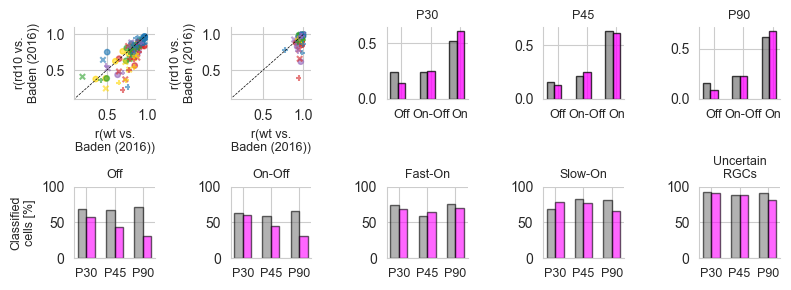

In [16]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3), sharey=False)

################ correlations with Baden (2016)
colors = ['tab:red'] * 9 + ['gold'] * 5 + ['tab:green'] * 6 + ['tab:blue'] * 8 + ['tab:purple'] * 4
size = 15
alpha = 0.6
marker_p30 = 'o'
marker_p45 = 'x'
marker_p90 = '+'
str_cluster = ['Off', 'On-Off', 'Fast-On', 'Slow-On', 'Uncertain\nRGCs']

ax[0, 0].scatter(np.diag(chirp_corr_p30_wt_baden), np.diag(chirp_corr_p30_rd_baden), s=size, alpha=alpha,
                 marker=marker_p30, color=colors)  #,edgecolors='black')
ax[0, 0].scatter(np.diag(chirp_corr_p45_wt_baden), np.diag(chirp_corr_p45_rd_baden), s=size, alpha=alpha,
                 marker=marker_p45, color=colors)  #,edgecolors='black')
ax[0, 0].scatter(np.diag(chirp_corr_p90_wt_baden), np.diag(chirp_corr_p90_rd_baden), s=size, alpha=alpha,
                 marker=marker_p90, color=colors)  #,edgecolors='black')
ax[0, 0].set_ylim(0.1, 1.1);
ax[0, 0].set_xlim(0.1, 1.1)
ax[0, 0].plot([-1, 1], [-1, 1], lw=0.5, ls='--', color='k')
ax[0, 0].set_xlabel('r(wt vs.\nBaden (2016))', fontsize=9)
ax[0, 0].set_ylabel('r(rd10 vs.\nBaden (2016))', fontsize=9)

ax[0, 1].scatter(np.diag(bar_corr_p30_wt_baden), np.diag(bar_corr_p30_rd_baden), s=size, alpha=alpha, marker=marker_p30,
                 color=colors)  #,edgecolors='black')
ax[0, 1].scatter(np.diag(bar_corr_p45_wt_baden), np.diag(bar_corr_p45_rd_baden), s=size, alpha=alpha, marker=marker_p45,
                 color=colors)  #,edgecolors='black')
ax[0, 1].scatter(np.diag(bar_corr_p90_wt_baden), np.diag(bar_corr_p90_rd_baden), s=size, alpha=alpha, marker=marker_p90,
                 color=colors)  #,edgecolors='black')
ax[0, 1].set_ylim(0.1, 1.1);
ax[0, 1].set_xlim(0.1, 1.1)
ax[0, 1].plot([-1, 1], [-1, 1], lw=0.5, ls='--', color='k')
ax[0, 1].set_xlabel('r(wt vs.\nBaden (2016))', fontsize=9)
ax[0, 1].set_ylabel('r(rd10 vs.\nBaden (2016))', fontsize=9)

################ OOi

bins = [-1, -0.2, 0.2, 1]
bin_labels = ['Off', 'On-Off', 'On']
x = np.arange(len(bin_labels))
width = 0.25

# P30
hist_wt_p30, _ = np.histogram(ooi_bar_wt_p30, bins=bins)
hist_rd_p30, _ = np.histogram(ooi_bar_rd_p30, bins=bins)
hist_wt_p30 = hist_wt_p30 / len(ooi_bar_wt_p30)
hist_rd_p30 = hist_rd_p30 / len(ooi_bar_rd_p30)

# P45
hist_wt_p45, _ = np.histogram(ooi_bar_wt_p45, bins=bins)
hist_rd_p45, _ = np.histogram(ooi_bar_rd_p45, bins=bins)
hist_wt_p45 = hist_wt_p45 / len(ooi_bar_wt_p45)
hist_rd_p45 = hist_rd_p45 / len(ooi_bar_rd_p45)

# P90
hist_wt_p90, _ = np.histogram(ooi_bar_wt_p90, bins=bins)
hist_rd_p90, _ = np.histogram(ooi_bar_rd_p90, bins=bins)
hist_wt_p90 = hist_wt_p90 / len(ooi_bar_wt_p90)
hist_rd_p90 = hist_rd_p90 / len(ooi_bar_rd_p90)
ax[0, 2].bar(x - width, hist_wt_p30, width, label='WT', color='gray', edgecolor='black', alpha=0.75)
ax[0, 2].bar(x, hist_rd_p30, width, label='rd10', color='magenta', edgecolor='black', alpha=0.75)
ax[0, 2].set_title('P30', fontsize=9)

# Plot data for each dataset
ax[0, 3].bar(x - width, hist_wt_p45, width, label='Dataset 1', color='gray', edgecolor='black', alpha=0.75)
ax[0, 3].bar(x, hist_rd_p45, width, label='Dataset 2', color='magenta', edgecolor='black', alpha=0.75)
ax[0, 3].set_title('P45', fontsize=9)

# Plot data for each dataset
ax[0, 4].bar(x - width, hist_wt_p90, width, label='Dataset 1', color='gray', edgecolor='black', alpha=0.75)
ax[0, 4].bar(x, hist_rd_p90, width, label='Dataset 2', color='magenta', edgecolor='black', alpha=0.75)
ax[0, 4].set_title('P90', fontsize=9)

for i in [2, 3, 4]:
    ax[0, i].set_xticks(x)
    ax[0, i].set_xticklabels(bin_labels, fontsize=9)

################ number cells per type ratios cs>0 vs csY0.25
bins = [0.5, 1.5, 2.5]
bin_labels = ['P30', 'P45', 'P90']
n = 4 - 1
x = np.arange(n) + 1
width = 0.3
for i in range(5):
    ax[1, i].bar(x - width, cs_ratio_wt_types[i, :-1], width=width, color='gray', edgecolor='k', label='WT', alpha=0.6)
    ax[1, i].bar(x, cs_ratio_rd_types[i, :-1], width=width, color='magenta', edgecolor='k', label='rd10', alpha=0.6)
    ax[1, i].set_xticks(x - .15)
    ax[1, i].set_xticklabels(bin_labels, fontsize=9)
    ax[1, i].set_title(str_cluster[i], fontsize=9)
    ax[1, 0].set_ylabel('Classified\ncells [%]', fontsize=9)
    ax[1, i].set_ylim(0, 100)

sns.despine()
fig.tight_layout()